<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Statistical Expectation

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Spatial Data Declustering**. 

**YouTube Lecture**: check out my lecture on [Statistical Expectation](https://youtu.be/QVgMt3cPMmM?si=jxTpkptDW6HcFa84). For your convenience here's a summary of the salient points.

#### Statistical Expectation

Defined as a probability weighted average, **statistical expectation** is a powerful concept in statistics. It is used for:

* ANOVA (analysis of variance)
* nested variogram modeling
* trend and residual modeling for nonstationary phenomenon
* decion making (expected net present value)

etc.

To demonstrate statistical expectation the following operators will be demonstrated with random variables, distributions:

* Expectation of a constant $\longrightarrow E\left[c\right] = c$

* Expectation of a random variable + a constant $\longrightarrow E\left[X + c\right] = E\left[X\right] + E\left[c\right] = E\left[X \right] + c$

* Expectation of the addition of two random variables $\longrightarrow E\left[X + Y\right] = E\left[X\right] + E\left[Y\right]$

* Expectation of the product of two random variables $\longrightarrow E\left[XY\right] = E\left[X\right]E\left[Y\right]$, if $X$ and $Y$ are independent

#### Load the Required Libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [1]:
import numpy as np                                            # arrays
import scipy as sp                                            # statistical distributions
import matplotlib.pyplot as plt                               # plotting
import math                                                   # square root to calculate standard deviation from variance

#### Specify, Sample and Visualize our Random Variables

First we build a simple bivariate distribution for random variables $X$ and $Y$. 

* we use the bivariate Gaussian distribution for convenience, but the derived equations for entral tendency and dispersion are general for any distribution.

Then we add another uncorrelation random variable, $Z$

We draw $L$ realizations from the bivariate distribution and plot the histograms and scatter plot.

* below I use sample statistic instead of population statistic notation to indicate that calculation is approximative, based on a limited sample size 

For our demonstration:

* all distributions are Gaussian, specified by mean and variance
* X and Y are correlated (specified by covariance)
* X and Y, Y and Z are not correlated

Let's specify, sample and visualize our random variable's distributions.

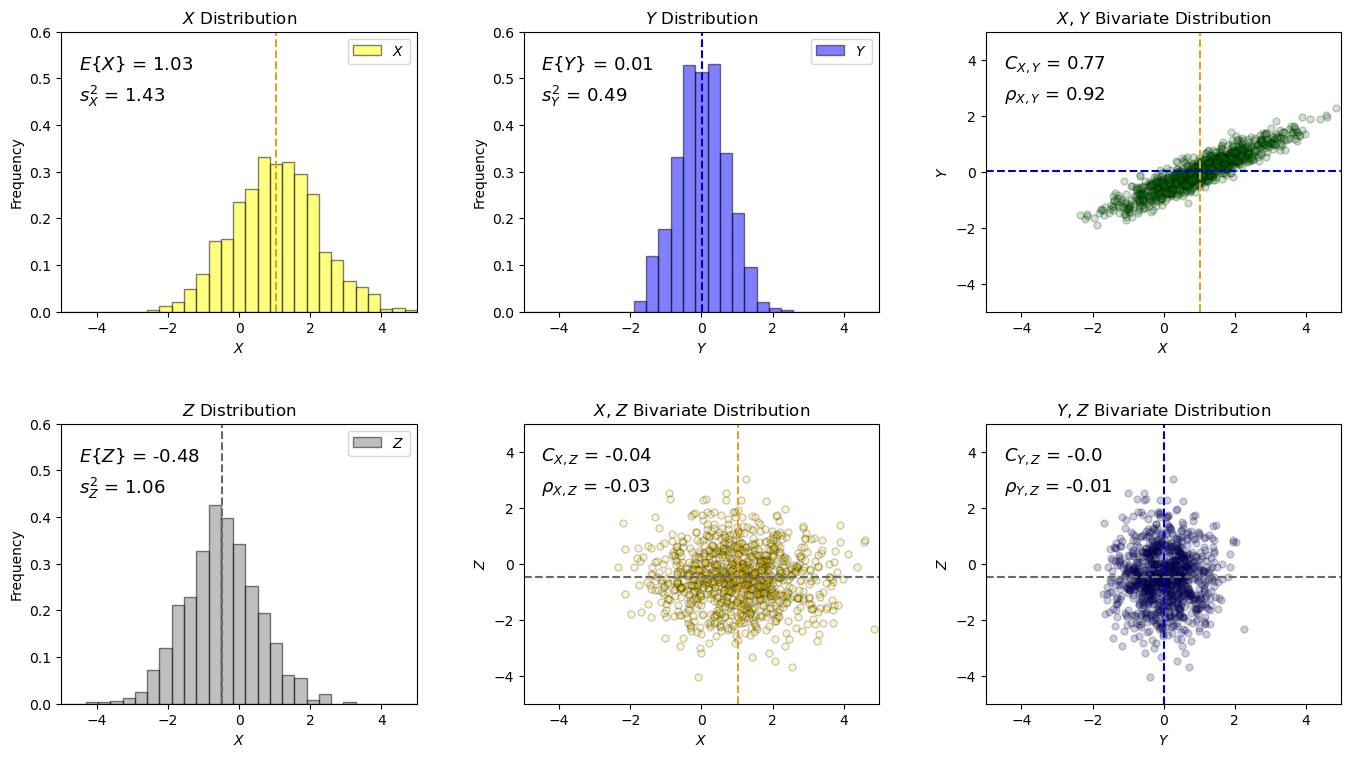

In [2]:
mean_X = 1.0; mean_Y = 0.0; mean_Z = -0.5                     # parameters for distribution
var_X = 1.5; var_Y = 0.5; var_Z = 1.0; cov_XY = 0.8
L = 1000                                                      # number of samples
seed = 13

np.random.seed(seed = seed)                                   # sample the random variables to visualize and check the results
R = np.random.multivariate_normal([mean_X,mean_Y],np.array([[var_X,cov_XY],[cov_XY,var_Y]]),size=L)
X = R[:,0]; Y = R[:,1]
Z = np.random.normal(loc = mean_Z,scale = var_Z,size=L)

xmin = -5; xmax = 5; nbins = 30                                # histogram plotting parameters

plt.subplot(231)                                               # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label=r'$X$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--')
plt.annotate(r'$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel(r'$X$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$X$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(232)                                               # annotated histogram of Y
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label=r'$Y$')
plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.annotate(r'$E\{Y\}$ = ' + str(np.round(np.average(Y),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_Y$ = ' + str(np.round(np.var(Y),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$Y$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(233)                                               # annotated scatter plot of X and Y
plt.scatter(X,Y,color='green',alpha=0.2,edgecolor='black',s=25)
plt.plot((np.average(X),np.average(X)),(xmin,xmax),color='goldenrod',ls='--'); plt.plot((xmin,xmax),(np.average(Y),np.average(Y)),color='mediumblue',ls='--')
plt.xlim([xmin,xmax]); plt.ylim([xmin,xmax])
plt.annotate(r'$C_{X,Y}$ = ' + str(np.round(np.cov(R,rowvar=False)[0,1],2)),(-4.5,3.7),fontsize = 13)
plt.annotate(r'$\rho_{X,Y}$ = ' + str(np.round(np.corrcoef(R,rowvar=False)[0,1],2)),(-4.5,2.6),fontsize = 13)
plt.xlabel('$X$'); plt.ylabel('$Y$'); plt.title('$X$, $Y$ Bivariate Distribution')

plt.subplot(234)                                               # annotated histogram of X
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='grey',density = True,label='$Z$')
plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.annotate(r'$E\{Z\}$ = ' + str(np.round(np.average(Z),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_Z$ = ' + str(np.round(np.var(Z),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel(r'$X$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$Z$ Distribution')
plt.legend(loc='upper right')

plt.subplot(235)                                               # annotated scatter plot of X and Y
plt.scatter(X,Z,color='gold',alpha=0.2,edgecolor='black',s=25)
plt.plot((np.average(X),np.average(X)),(xmin,xmax),color='goldenrod',ls='--'); plt.plot((xmin,xmax),(np.average(Z),np.average(Z)),color='dimgrey',ls='--')
plt.xlim([xmin,xmax]); plt.ylim([xmin,xmax])
plt.annotate(r'$C_{X,Z}$ = ' + str(np.round(np.cov(X,Z)[0][1],2)),(-4.5,3.7),fontsize = 13)
plt.annotate(r'$\rho_{X,Z}$ = ' + str(np.round(np.corrcoef(X,Z)[0][1],2)),(-4.5,2.6),fontsize = 13)
plt.xlabel(r'$X$'); plt.ylabel(r'$Z$'); plt.title(r'$X$, $Z$ Bivariate Distribution')

plt.subplot(236)                                               # annotated scatter plot of X and Y
plt.scatter(Y,Z,color='darkblue',alpha=0.2,edgecolor='black',s=25)
plt.plot((np.average(Y),np.average(Y)),(xmin,xmax),color='mediumblue',ls='--'); plt.plot((xmin,xmax),(np.average(Z),np.average(Z)),color='dimgrey',ls='--')
plt.xlim([xmin,xmax]); plt.ylim([xmin,xmax])
plt.annotate(r'$C_{Y,Z}$ = ' + str(np.round(np.cov(Y,Z)[0][1],2)),(-4.5,3.7),fontsize = 13)
plt.annotate(r'$\rho_{Y,Z}$ = ' + str(np.round(np.corrcoef(Y,Z)[0][1],2)),(-4.5,2.6),fontsize = 13)
plt.xlabel(r'$Y$'); plt.ylabel(r'$Z$'); plt.title(r'$Y$, $Z$ Bivariate Distribution')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.3, hspace=0.4); plt.show()

Now we can walk through various operators for random variables with expectation. 

* Focus on the statistical expectation operators (e.g., $E\left[X + c\right] = E\left[X \right] + c$)
* When applicable I also show variance relations (e.g., $\sigma^2_{X+c} = \sigma^2_{X}$), these can be derived by expectation, but I have not added the deriviations here for brevity. 

#### Expectation of a Random Variable + Constant

I demonstrate the following relationship with a random variable, $X$, and a constant, $c$.

$$
E\left[X + c\right] = E\left[X\right] + E\left[c\right] = E\left[X \right] + c
$$

with expectation it can also be shown that the variance will remain constant with the addition of a constant:

$$
\sigma^2_{X+c} = \sigma^2_{X}
$$


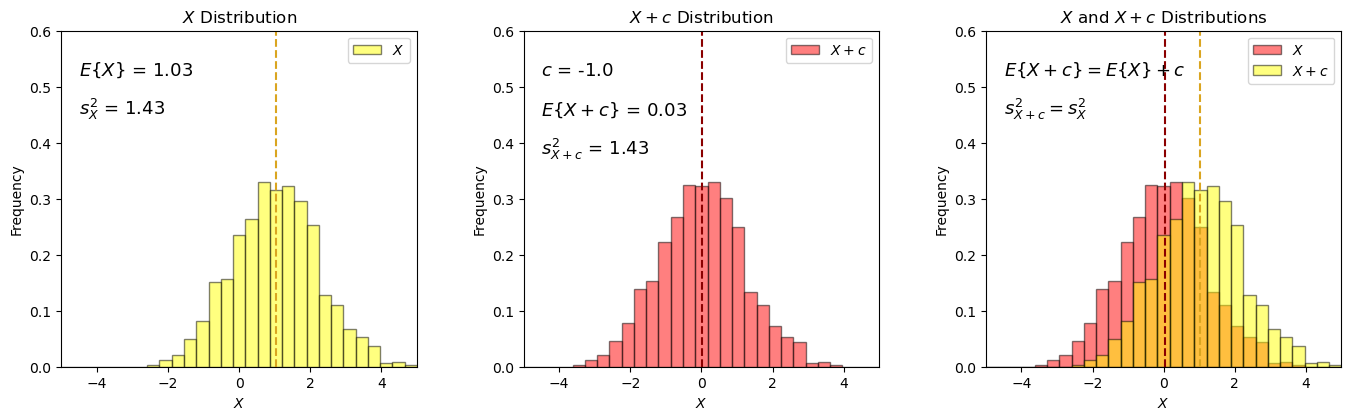

In [3]:
c = -1.0                                                      # set the constant and add it to the random variable
X1 = X + c

xmin = -5; xmax = 5; nbins = 30                               # plotting parameters

plt.subplot(131)                                              # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label=r'$X$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--')
plt.annotate(r'$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel(r'$X$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$X$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(132)                                              # annotated histogram of Y
plt.hist(x=X1,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label=r'$X + c$')
plt.vlines(np.average(X1),0,0.6,color='darkred',ls='--')
plt.annotate(r'$c$ = ' + str(np.round(c,2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$E\{X+c\}$ = ' + str(np.round(np.average(X1),2)),(-4.5,0.45),fontsize = 13)
plt.annotate(r'$s^2_{X+c}$ = ' + str(np.round(np.var(X1),2)),(-4.5,0.38),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$X + c$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(133)                                              # annotated histogram of Y
plt.hist(x=X1,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label=r'$X$')
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label=r'$X + c$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(X1),0,0.6,color='darkred',ls='--')
plt.annotate(r'$E\{X+c\} = E\{X\} + c$',(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_{X+c} = s^2_{X}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel(r'$X$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$X$ and $X + c$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.7, wspace=0.3, hspace=0.4); plt.show()

Adding a constant shift the random variable's distribution, and does not change the dispersion!

#### Expectation of a Product of a Random Variable and a Constant

I demonstrate the following relationship with a random variable, $Y$, and a constant, $c$.

$$
E\left[cY\right] = cE\left[Y\right]
$$

with expectation it can also be shown that the variance will scale as:

$$
\sigma^2_{cY} = c^2 \sigma^2_{Y}
$$

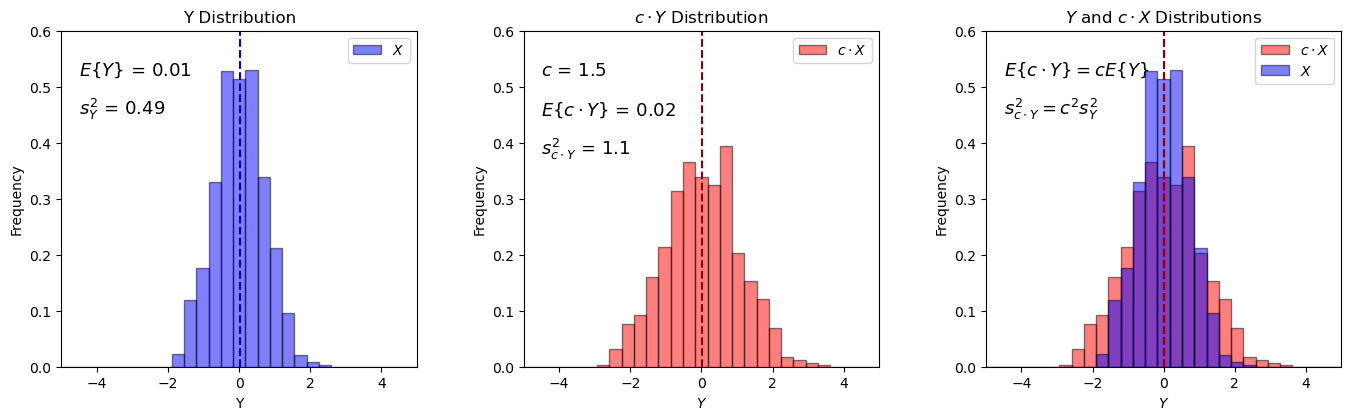

In [4]:
c = 1.5                                                       # set the constant and multiply the random varianble with it
Y2 = Y * c

xmin = -5; xmax = 5; nbins = 30                               # plotting parameters

plt.subplot(131)                                              # annotated histogram of X
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label=r'$X$')
plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.annotate(r'$E\{Y\}$ = ' + str(np.round(np.average(Y),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_Y$ = ' + str(np.round(np.var(Y),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel('Y'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('Y Distribution') 
plt.legend(loc='upper right')

plt.subplot(132)                                              # annotated histogram of Y
plt.hist(x=Y2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label=r'$c \cdot X$')
plt.vlines(np.average(Y2),0,0.6,color='darkred',ls='--')
plt.annotate(r'$c$ = ' + str(np.round(c,2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$E\{c \cdot Y\}$ = ' + str(np.round(np.average(Y2),2)),(-4.5,0.45),fontsize = 13)
plt.annotate(r'$s^2_{c \cdot Y}$ = ' + str(np.round(np.var(Y2),2)),(-4.5,0.38),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$c \cdot Y$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(133)                                              # annotated histogram of Y
plt.hist(x=Y2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label=r'$c \cdot X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label=r'$X$')
plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--'); plt.vlines(np.average(Y2),0,0.6,color='darkred',ls='--')
plt.annotate(r'$E\{c \cdot Y\} = cE\{Y\}$',(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_{c \cdot Y} = c^2 s^2_{Y}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$Y$ and $c \cdot X$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.7, wspace=0.3, hspace=0.4); plt.show()

if the original mean is 0, then the only result is for the variance to change, stretch or squeeze by a factor of $c^2$. The mean remains almost 0.0:

$$
E\left[cY\right] = cE\left[Y\right]
$$

if $E\left[Y\right] = 0.0$, then $cE\left[Y\right] = 0$, regardless of $c$.

Let's repeat this with a random variable with a expectation not equal to 0.0, i.e., random variable, $X$, $E\{X\} \ne 0.0$ and a constant, $c$.

$$
E\left[cX\right] = cE\left[X\right]
$$

once again, with expectation it can be shown that the variance will scale as:

$$
\sigma^2_{cX} = c^2 \sigma^2_{X}
$$

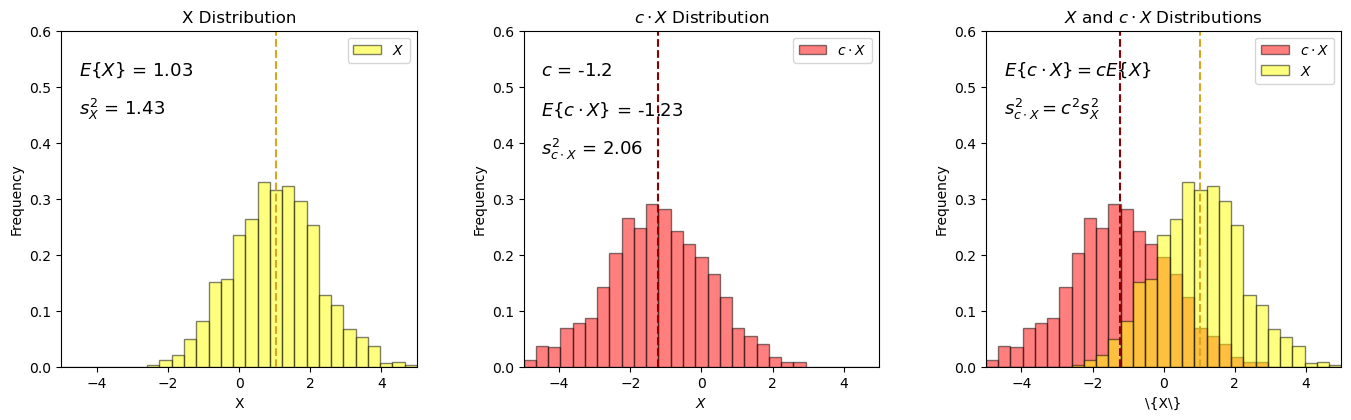

In [5]:
c = -1.2                                                      # set the value and multiply the random variable with it
X2 = X * c

xmin = -5; xmax = 5; nbins = 30                               # plotting parameters

plt.subplot(131)                                              # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--')
plt.annotate(r'$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.xlabel('X'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('X Distribution') 
plt.legend(loc='upper right')

plt.subplot(132)                                              # annotated histogram of Y
plt.hist(x=X2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label=r'$c \cdot X$')
plt.vlines(np.average(X2),0,0.6,color='darkred',ls='--')
plt.annotate(r'$c$ = ' + str(np.round(c,2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$E\{c \cdot X\}$ = ' + str(np.round(np.average(X2),2)),(-4.5,0.45),fontsize = 13)
plt.annotate(r'$s^2_{c \cdot X}$ = ' + str(np.round(np.var(X2),2)),(-4.5,0.38),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$c \cdot X$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(133)                                              # annotated histogram of Y
plt.hist(x=X2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='red',density = True,label=r'$c \cdot X$')
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(X2),0,0.6,color='darkred',ls='--')
plt.annotate(r'$E\{c \cdot X\} = cE\{X\}$',(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_{c \cdot X} = c^2 s^2_{X}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel(r'\{X\}'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title(r'$X$ and $c \cdot X$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.7, wspace=0.3, hspace=0.4); plt.show()

The constant scales the distribution, stretches or squeezes the distribution and shifts the expectation by $cE\left[X\right]$.

#### Expectation of the Addition of Two Random Variables

I demonstrate the following relationship for the addition of two random variables, $X$, and , $Y$.

$$
E\left[X + Y\right] = E\left[X\right] + E\left[Y\right]
$$

with expectation it can also be shown that the resulting variance will be:

$$
\sigma^2_{X+Y} = \sigma^2_X + \sigma^2_Y + 2 \cdot C_{X,Y}
$$

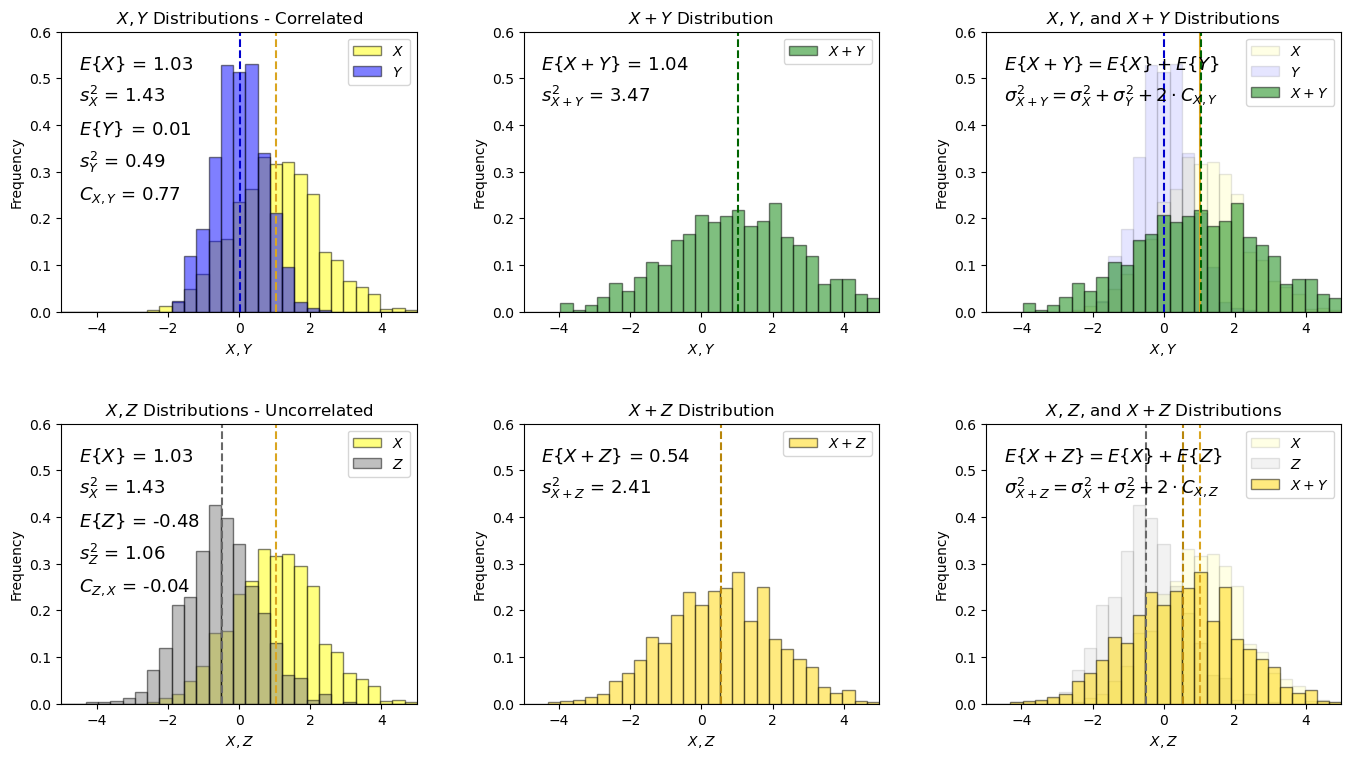

In [6]:
XY = X + Y                                                    # add 2 random variables
XZ = Z + X

xmin = -5; xmax = 5; nbins = 30                               # plotting parameters

plt.subplot(231)                                              # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label='$Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.annotate(r'$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate(r'$E\{Y\}$ = ' + str(np.round(np.average(Y),2)),(-4.5,0.38),fontsize = 13)
plt.annotate(r'$s^2_{Y}$ = ' + str(np.round(np.var(Y),2)),(-4.5,0.31),fontsize = 13)
plt.annotate(r'$C_{X,Y}$ = ' + str(np.round(np.cov(R,rowvar=False)[0,1],2)),(-4.5,0.24),fontsize = 13)
plt.xlabel('$X, Y$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X, Y$ Distributions - Correlated') 
plt.legend(loc='upper right')

plt.subplot(232)                                              # annotated histogram of Y
plt.hist(x=XY,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='green',density = True,label='$X + Y$')
plt.vlines(np.average(XY),0,0.6,color='darkgreen',ls='--')
plt.annotate(r'$E\{X + Y\}$ = ' + str(np.round(np.average(XY),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_{X + Y}$ = ' + str(np.round(np.var(XY),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X + Y$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(233)                                              # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='blue',density = True,label='$Y$')
plt.hist(x=XY,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='green',density = True,label='$X + Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod'); plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--');
plt.vlines(np.average(XY),0,0.6,color='darkgreen',ls='--')
plt.annotate(r'$E\{X + Y\} = E\{X\} + E\{Y\}$',(-4.5,0.52),fontsize = 13)
plt.annotate(r'$\sigma^2_{X+Y} = \sigma^2_X + \sigma^2_Y + 2 \cdot C_{X,Y}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X,Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Y$, and $X + Y$ Distributions') 
plt.legend(loc='upper right')

plt.subplot(234)                                              # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='grey',density = True,label='$Z$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.annotate(r'$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate(r'$E\{Z\}$ = ' + str(np.round(np.average(Z),2)),(-4.5,0.38),fontsize = 13)
plt.annotate(r'$s^2_{Z}$ = ' + str(np.round(np.var(Z),2)),(-4.5,0.31),fontsize = 13)
plt.annotate(r'$C_{Z,X}$ = ' + str(np.round(np.cov(X,Z)[0][1],2)),(-4.5,0.24),fontsize = 13)
plt.xlabel('$X,Z$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X, Z$ Distributions - Uncorrelated') 
plt.legend(loc='upper right')

plt.subplot(235)                                              # annotated histogram of Y
plt.hist(x=XZ,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='$X + Z$')
plt.vlines(np.average(XZ),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate(r'$E\{X + Z\}$ = ' + str(np.round(np.average(XZ),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_{X + Z}$ = ' + str(np.round(np.var(XZ),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X + Z$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(236)                                              # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='grey',density = True,label='$Z$')
plt.hist(x=XZ,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='$X + Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--');
plt.vlines(np.average(XZ),0,0.6,color='darkgoldenrod',ls='--');
plt.annotate(r'$E\{X + Z\} = E\{X\} + E\{Z\}$',(-4.5,0.52),fontsize = 13)
plt.annotate(r'$\sigma^2_{X + Z} = \sigma^2_X + \sigma^2_Z + 2 \cdot C_{X,Z}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X,Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Z$, and $X + Z$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.3, hspace=0.4); plt.show()

The expected values for both cases are additive, this is general and holds if the random variables are correlated (e.g., $X$ and $Y$) or uncorrelated (e.g., $Z$ and $Y$).

Also the variances are additive, the only difference is that we have to include the covaraince term, $2 \cdot C_{X,Y}$, if there is correlation. 

That was addition of random variables, what about subtraction of random variables?

#### Expectation of the Subtraction of Two Random Variables

I demonstrate the following relationship for the addition of two random variables, $X$, and , $Y$.

$$
E\left[X - Y\right] = E\left[X\right] - E\left[Y\right]
$$

with expectation it can also be shown that the resulting variance will be:

$$
\sigma^2_{X-Y} = \sigma^2_X + \sigma^2_Y - 2 \cdot C_{X,Y} 
$$

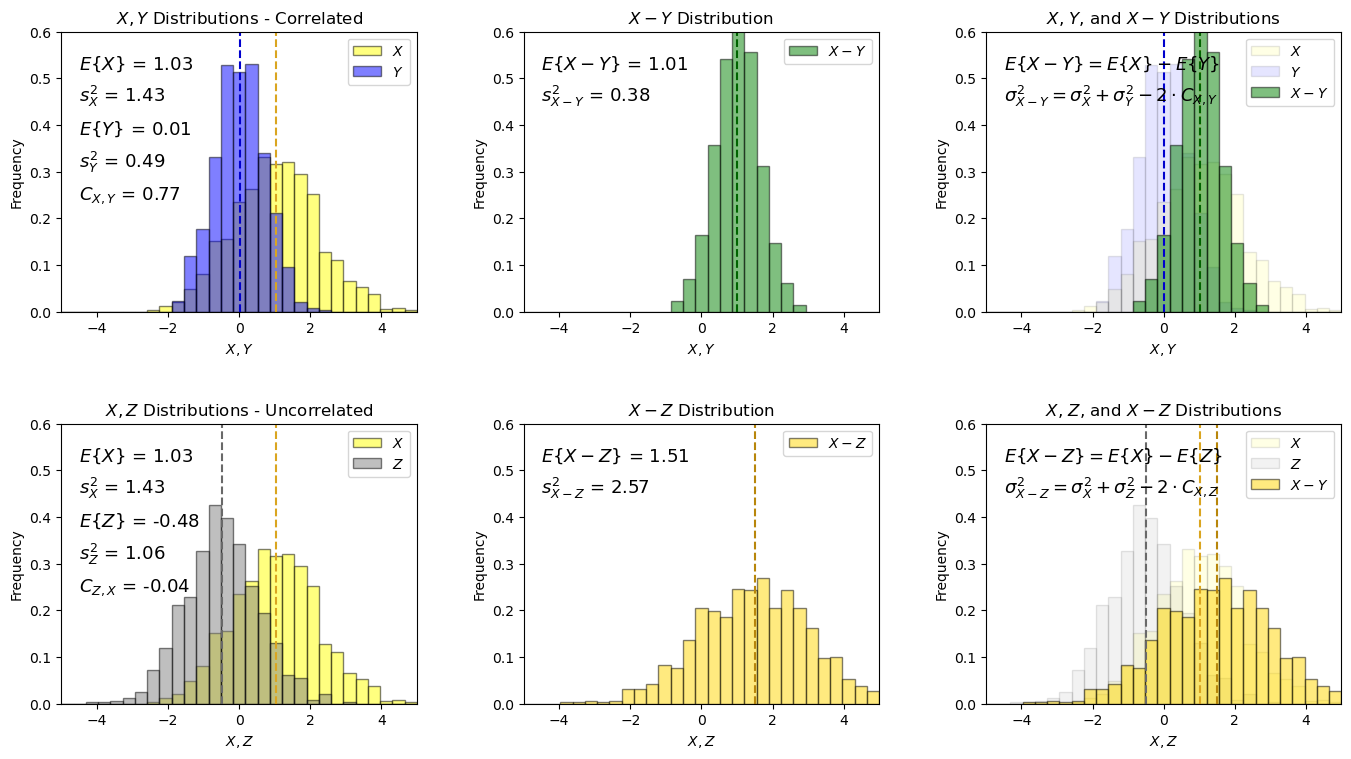

In [7]:
XY6 = X - Y                                                   # subtract 2 random variables
XZ6 = X - Z

xmin = -5; xmax = 5; nbins = 30                               # plotting parameters

plt.subplot(231)                                              # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='blue',density = True,label='$Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.annotate(r'$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate(r'$E\{Y\}$ = ' + str(np.round(np.average(Y),2)),(-4.5,0.38),fontsize = 13)
plt.annotate(r'$s^2_{Y}$ = ' + str(np.round(np.var(Y),2)),(-4.5,0.31),fontsize = 13)
plt.annotate(r'$C_{X,Y}$ = ' + str(np.round(np.cov(R,rowvar=False)[0,1],2)),(-4.5,0.24),fontsize = 13)
plt.xlabel('$X, Y$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X, Y$ Distributions - Correlated') 
plt.legend(loc='upper right')

plt.subplot(232)                                              # annotated histogram of Y
plt.hist(x=XY6,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='green',density = True,label='$X - Y$')
plt.vlines(np.average(XY6),0,0.6,color='darkgreen',ls='--')
plt.annotate(r'$E\{X - Y\}$ = ' + str(np.round(np.average(XY6),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_{X - Y}$ = ' + str(np.round(np.var(XY6),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X - Y$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(233)                                              # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='blue',density = True,label='$Y$')
plt.hist(x=XY6,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='green',density = True,label='$X - Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Y),0,0.6,color='mediumblue',ls='--')
plt.vlines(np.average(XY6),0,0.6,color='darkgreen',ls='--')
plt.annotate(r'$E\{X - Y\} = E\{X\} - E\{Y\}$',(-4.5,0.52),fontsize = 13)
plt.annotate(r'$\sigma^2_{X - Y} = \sigma^2_X + \sigma^2_Y - 2 \cdot C_{X,Y}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X,Y$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Y$, and $X - Y$ Distributions') 
plt.legend(loc='upper right')

plt.subplot(234)                                              # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='grey',density = True,label='$Z$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.annotate(r'$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate(r'$E\{Z\}$ = ' + str(np.round(np.average(Z),2)),(-4.5,0.38),fontsize = 13)
plt.annotate(r'$s^2_{Z}$ = ' + str(np.round(np.var(Z),2)),(-4.5,0.31),fontsize = 13)
plt.annotate(r'$C_{Z,X}$ = ' + str(np.round(np.cov(X,Z)[0][1],2)),(-4.5,0.24),fontsize = 13)
plt.xlabel('$X,Z$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X, Z$ Distributions - Uncorrelated') 
plt.legend(loc='upper right')

plt.subplot(235)                                              # annotated histogram of Y
plt.hist(x=XZ6,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='$X - Z$')
plt.vlines(np.average(XZ6),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate(r'$E\{X - Z\}$ = ' + str(np.round(np.average(XZ6),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_{X - Z}$ = ' + str(np.round(np.var(XZ6),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X - Z$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(236)                                              # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='$X$')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='grey',density = True,label='$Z$')
plt.hist(x=XZ6,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='$X - Y$')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.vlines(np.average(XZ6),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate(r'$E\{X - Z\} = E\{X\} - E\{Z\}$',(-4.5,0.52),fontsize = 13)
plt.annotate(r'$\sigma^2_{X - Z} = \sigma^2_X + \sigma^2_Z - 2 \cdot C_{X,Z}$',(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X,Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Z$, and $X - Z$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.3, hspace=0.4); plt.show()

#### Expectation of the Product of Two Random Variables 

I demonstrate the following relationship for the product of two random variables, $X$ and $Z$.

$$
E\left[XZ\right] = E\left[X\right] \cdot E\left[Z\right]
$$

Note, I only cover the case for two independent variables as this is required for this relation to hold.

* there may be some departure from the result predicted from the analytical expression due to a small amount of correlation (not quite equal to 0.0).

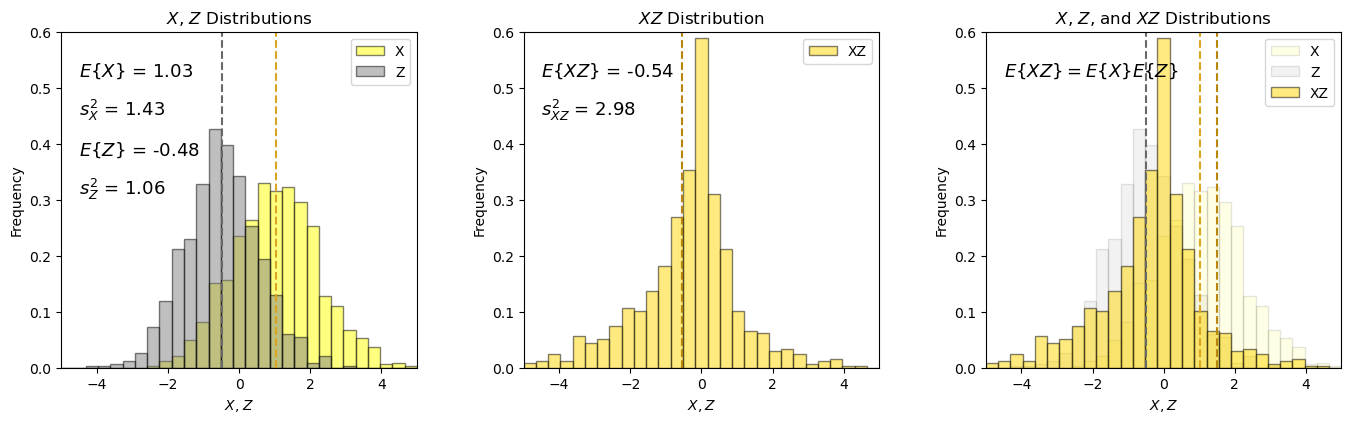

In [8]:
ZX = Z * X                                                    # product of 2 independent random variables

xmin = -5; xmax = 5; nbins = 30                               # plotting parameters

plt.subplot(131)                                              # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='yellow',density = True,label='X')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='grey',density = True,label='Z')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.annotate(r'$E\{X\}$ = ' + str(np.round(np.average(X),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_X$ = ' + str(np.round(np.var(X),2)),(-4.5,0.45),fontsize = 13)
plt.annotate(r'$E\{Z\}$ = ' + str(np.round(np.average(Z),2)),(-4.5,0.38),fontsize = 13)
plt.annotate(r'$s^2_{Z}$ = ' + str(np.round(np.var(Z),2)),(-4.5,0.31),fontsize = 13)
plt.xlabel('$X$, $Z$'); plt.xlim([xmin,xmax]); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Z$ Distributions') 
plt.legend(loc='upper right')

plt.subplot(132)                                              # annotated histogram of Y
plt.hist(x=ZX,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='XZ')
plt.vlines(np.average(ZX),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate(r'$E\{XZ\}$ = ' + str(np.round(np.average(ZX),2)),(-4.5,0.52),fontsize = 13)
plt.annotate(r'$s^2_{XZ}$ = ' + str(np.round(np.var(ZX),2)),(-4.5,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('$X, Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$XZ$ Distribution') 
plt.legend(loc='upper right')

plt.subplot(133)                                              # annotated histogram of Y
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='yellow',density = True,label='X')
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.1,edgecolor='black',color='grey',density = True,label='Z')
plt.hist(x=ZX,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='gold',density = True,label='XZ')
plt.vlines(np.average(X),0,0.6,color='goldenrod',ls='--'); plt.vlines(np.average(Z),0,0.6,color='dimgrey',ls='--')
plt.vlines(np.average(XZ6),0,0.6,color='darkgoldenrod',ls='--')
plt.annotate(r'$E\{XZ\} = E\{X\}E\{Z\}$',(-4.5,0.52),fontsize = 13)

plt.xlim([xmin,xmax]); plt.xlabel('$X,Z$'); plt.ylabel('Frequency'); plt.ylim([0,0.6]); plt.title('$X$, $Z$, and $XZ$ Distributions') 
plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.7, wspace=0.3, hspace=0.4); plt.show()

#### Comments

I hope you found this chapter helpful. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources),

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)